## Executive Summary

#### About Data:

* I used Restaurant Review dataset where can be downloaded from Kaggle. 
* Dataset type is tsv, so the data was seperated with 'tab'.
* Dataset has 900 entry and 2 columns which are called 'Review' and 'Liked'.

#### Preprocessing the dataset

* Removed the stopwords from Review statements
* Used Porter Stemmer for finding their root.
* Removed any punctuation and transformed lowercase all words.
* Transformed the words into the numeric value by usin CountVectorizer.

#### Build the Models

* Gaussian Naive Bayes, XGBoost and Neural Network was used in this project.
* Confusion matrix and Classification Report were used to evaluate the model.
* Neural Network was designed with one input, two hidden layer and one output layer.
* ReLu and Sigmoid activation functions were used.
* Adam optimizer was used and Binary Cross Entropy was used as a loss function.
* 8 epochs and 35 batch size were used to train the dataset. (I tried with 16 epochs but this caused overfitting. So, I decrease the epochs gradually and the best epochs is 8.)

#### Evaluate the Models

* Gaussian Naive Bayes has 0.73 accuracy, XGBoost 0.72, and Neural Network 0.78 accuracy score.
* Also, Gaussian Naive Bayes F1 Score is 0.72, XGBoost 0.74, and Neural Network 0.82 F1 Score.
* All in all, Neural Network is realiable model. It can be used to classify the Review Sentences.

# Import the libraries

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from xgboost import XGBRFClassifier, XGBClassifier

import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential
from keras.layers import Dense, Dropout, Embedding

[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load the dataset

In [2]:
data = pd.read_csv('RestaurantReviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
data.shape

(900, 2)

# Divide the words root and remove the stopwords

In [4]:
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [5]:
corpus=[]

for i in range(0, 900):
  review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [6]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

# Transform the dataset word to the numeric value

In [7]:
cv = CountVectorizer(max_features = 1420)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

# Split the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
y_train.shape

(720,)

# Build Gaussian Naive Bayes Model

In [36]:
classifier = GaussianNB()

# Train the dataset

In [37]:
classifier.fit(X_train, y_train)

GaussianNB()

# Model prediction

In [38]:
y_pred = classifier.predict(X_test)

# Evaluate the model

In [39]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[67 11]
 [38 64]]


0.7277777777777777

In [45]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.64      0.86      0.73        78
           1       0.85      0.63      0.72       102

    accuracy                           0.73       180
   macro avg       0.75      0.74      0.73       180
weighted avg       0.76      0.73      0.73       180



# Build XGBoost Model

In [40]:
model2 = XGBClassifier()

In [41]:
model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
y_pred2 = model2.predict(X_test)

In [43]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)

accuracy_score(y_test, y_pred2)

[[58 20]
 [30 72]]


0.7222222222222222

In [46]:
cr2 = classification_report(y_test,y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.66      0.74      0.70        78
           1       0.78      0.71      0.74       102

    accuracy                           0.72       180
   macro avg       0.72      0.72      0.72       180
weighted avg       0.73      0.72      0.72       180



## Build the Neural Network

In [47]:
model3 = Sequential([
    Dense(32, activation = 'relu', input_shape=(None,16,1420)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

In [48]:
model3.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy']
             )

## Train the Data

In [49]:
hist = model3.fit(X_train, y_train,
                 batch_size= 35,
                 epochs=8,
                 validation_split=0.2)

Epoch 1/8
17/17 [==============================] - 1s 16ms/step - loss: 0.6923 - accuracy: 0.5226 - val_loss: 0.6889 - val_accuracy: 0.5764
Epoch 2/8
17/17 [==============================] - 0s 5ms/step - loss: 0.6747 - accuracy: 0.6788 - val_loss: 0.6847 - val_accuracy: 0.5694
Epoch 3/8
17/17 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.7656 - val_loss: 0.6733 - val_accuracy: 0.6250
Epoch 4/8
17/17 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.8368 - val_loss: 0.6533 - val_accuracy: 0.6458
Epoch 5/8
17/17 [==============================] - 0s 5ms/step - loss: 0.5523 - accuracy: 0.8872 - val_loss: 0.6097 - val_accuracy: 0.7153
Epoch 6/8
17/17 [==============================] - 0s 5ms/step - loss: 0.4556 - accuracy: 0.9358 - val_loss: 0.5503 - val_accuracy: 0.7917
Epoch 7/8
17/17 [==============================] - 0s 6ms/step - loss: 0.3369 - accuracy: 0.9653 - val_loss: 0.4770 - val_accuracy: 0.8403
Epoch 8/8
17/17 [=========

In [50]:
history_dict = hist.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluate the model

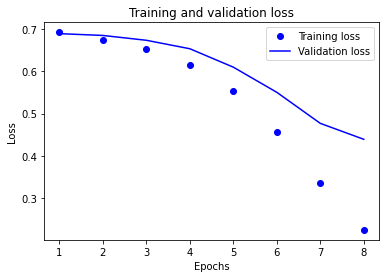

In [51]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

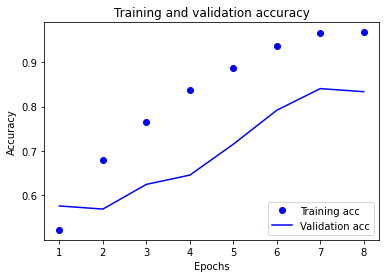

In [52]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [58]:
y_pred3 = model3.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [62]:
y_pred3 = [1 if y>= 0.5 else 0 for y in y_pred3]

In [63]:
cr3 = classification_report(y_test, y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        78
           1       0.78      0.85      0.82       102

    accuracy                           0.78       180
   macro avg       0.78      0.77      0.78       180
weighted avg       0.78      0.78      0.78       180

